In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('SUV_Purchase.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


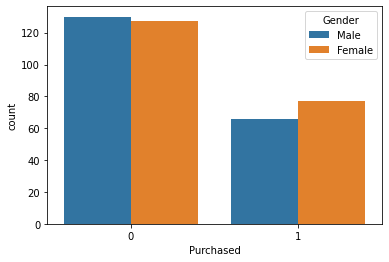

In [ ]:
sns.countplot(data=df, x="Purchased", hue="Gender");

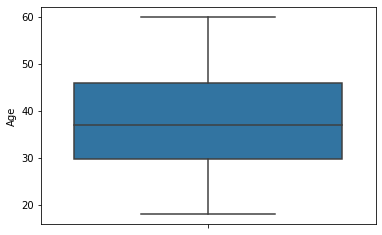

In [ ]:
sns.boxplot(data=df, y="Age");

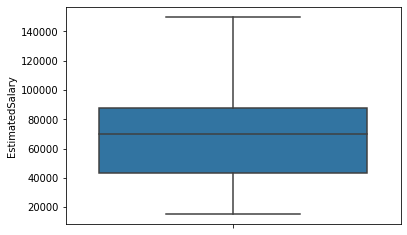

In [ ]:
sns.boxplot(data=df, y="EstimatedSalary");

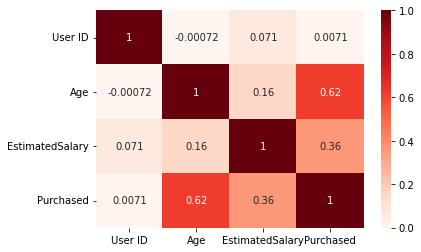

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Reds');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
Q1 = df['EstimatedSalary'].quantile(0.25)
Q3 = df['EstimatedSalary'].quantile(0.75)

IQR = Q3 - Q1
high_limit = Q3 + (IQR * 1.5)
low_limit = Q1 - (IQR * 1.5)

print(high_limit)
print(low_limit)

155500.0
-24500.0


---

In [ ]:
col_cat = df.select_dtypes(include=['object'])
col_cat.columns

Index(['Gender'], dtype='object')

In [ ]:
df = pd.get_dummies(columns=['Gender'], data=df)

In [ ]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [ ]:
df.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [ ]:
df.rename(columns = {'EstimatedSalary' : 'Salary'}, inplace = True)

In [ ]:
X = df[['Age', 'Salary', 'Gender_Female', 'Gender_Male']]
y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, stratify=y, test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
for i in range(2, 11):
    model = DecisionTreeClassifier(max_depth = i, random_state=13)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, round(accuracy_score(y_test, pred), 4))

2 0.85
3 0.85
4 0.85
5 0.8625
6 0.8
7 0.8125
8 0.8
9 0.8
10 0.8


In [ ]:
dtc = DecisionTreeClassifier(max_depth=5, random_state=13)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.8625

In [ ]:
confusion_matrix(y_test, pred)

array([[43,  8],
       [ 8, 21]])

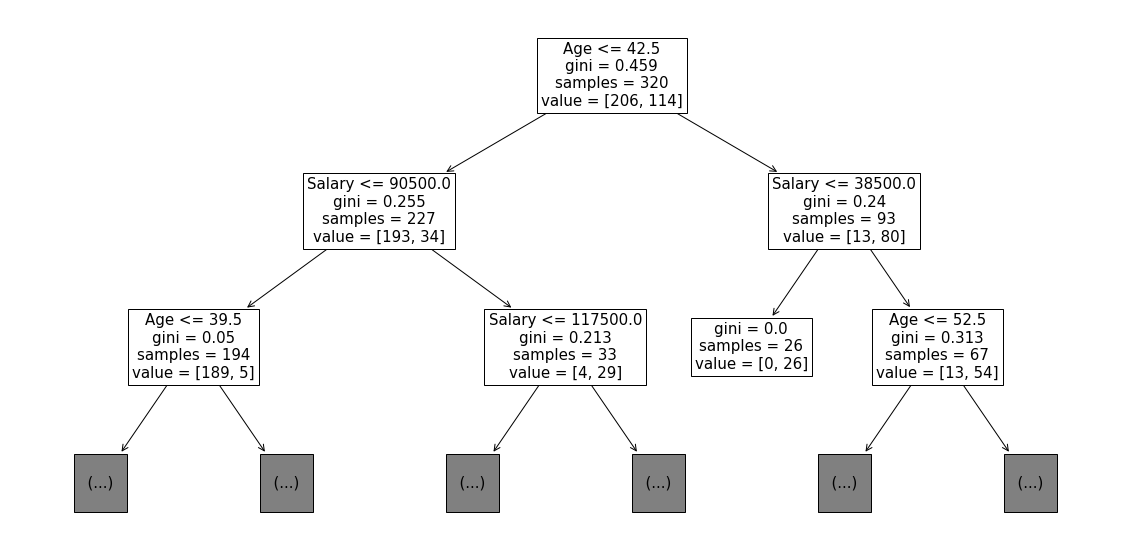

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=X_train.columns, fontsize=15, max_depth=2);